# make sure what python expo distribution does

what does numpy.random.exponential do?

According to [the documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html) we have:

$$f\left(x; \frac{1}{\tau}\right)=\frac{1}{\tau}e^{\frac{-x}{\tau}}$$

it draws random samples according to the exponential distribution, where $\tau$ is mean life time. It is scaled / normalized to $\tau$ itself.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

First we crate a sample distribution

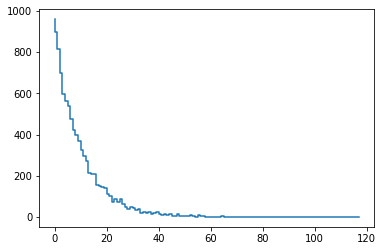

In [2]:
tau_sim = 1
data = np.random.exponential(tau_sim, size=10000)
hist = np.histogram(data, bins="auto")[0]
x = np.arange(0, len(hist), 1)

plt.step(x, hist)

now we define an exponential fit function

In [3]:
def fit_function(x, *p):
    # Exponential function
    return p[0] * np.exp(-x / p[1])

# fit params and some initial values
y = hist
x = x
p = [1, 1]

# do fit
popt, pcov = curve_fit(fit_function, x, y, p0=p)

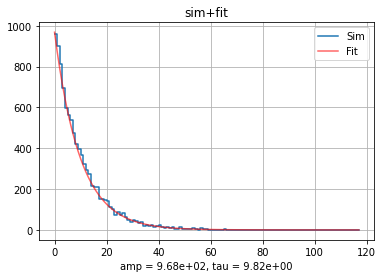

In [4]:
# plot fit and data

fig = plt.figure()
ax = fig.gca()
ax.step(x, y, label='Sim', where='post')
ax.plot(x, fit_function(x, *popt), 'r', label='Fit', alpha=0.6)
ax.set_xlabel('amp = {:0.2e}, tau = {:0.2e}'.format(popt[0], popt[1]))
ax.set_title('sim+fit')
legend = ax.legend(loc='upper right', shadow=False)
ax.grid()

In [5]:
print(f'amp is {popt[0]:0.2e} and tau is {popt[1]:0.2e}')

amp is 9.68e+02 and tau is 9.82e+00
